In [3]:
# import lib functions
from part2lib import *

# 变化率

## 油井已知
* 油井的容量变化和油井的流速变化

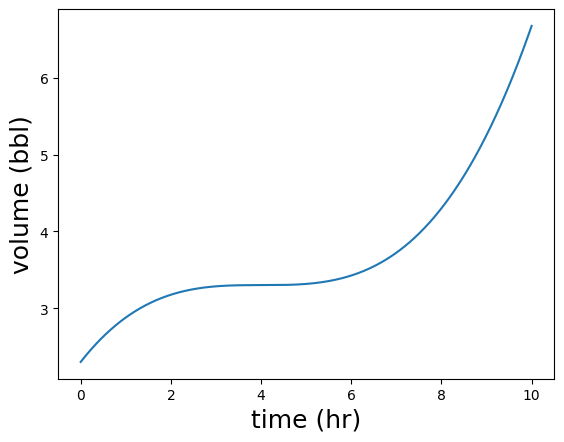

In [4]:
plot_volume(volume, 0, 10)

## 计算平均流速
* 给出开始时间和结束时间，以及在这段时间内采油体积，计算平均流速
* 平均流速就是`割线`的`斜率`

In [5]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

average_flow_rate(volume, 4, 9)

0.390625

* 当斜率为负时，表示平均流速在呈减少的趋势变化
* 当斜率为正时，则是增加

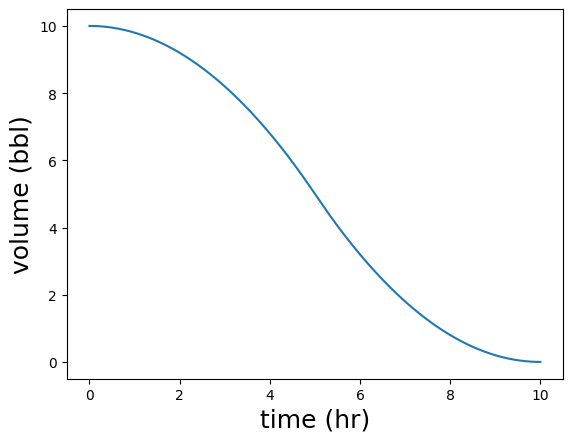

In [8]:
plot_volume(decreasing_volume, 0, 10)

In [9]:
average_flow_rate(decreasing_volume, 0, 4) # 减少的趋势，所以斜率为负

-0.8

## 绘制割线

In [ ]:
def secant_line(f, x1, x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1)) / (x2-x1)
    return line

def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    plot_function(line, x1, x2, c=color)
    plt.scatter([x1, x2], [f(x1), f(x2)], c=color)

plot_function(volume, 0, 10)
plot_secant(volume, 4, 9)

In [14]:
# 计算每个0.5h的平均流速

import numpy as np

def interval_flow_rates(v, t1, t2, dt):
    return [(t, average_flow_rate(v, t, t+dt)) for t in np.arange(t1, t2, dt)]

interval_flow_rates(volume, 0, 10, 1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

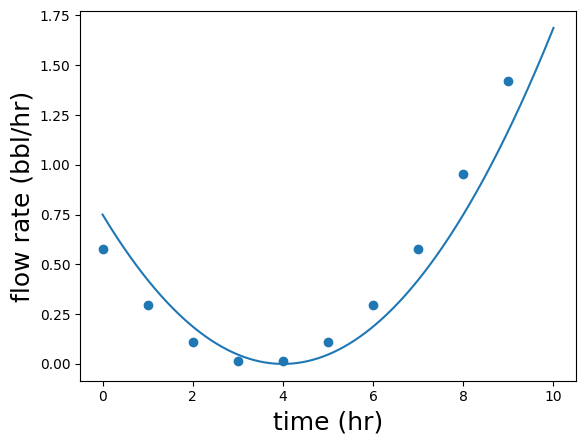

In [21]:
# 绘制图像
def plot_interval_flow_rates(volume, t1, t2, dt):
    series = interval_flow_rates(volume, t1, t2, dt)
    times = [t for (t, _) in series]
    rates = [q for (_, q) in series]
    plt.scatter(times, rates)

plot_interval_flow_rates(volume, 0, 10, 1)
plot_flow_rate(flow_rate, 0, 10)

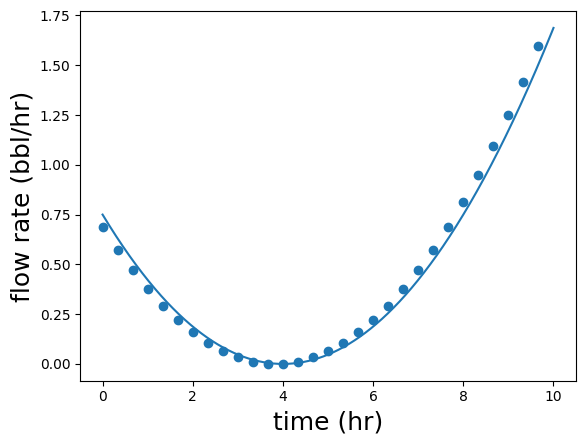

In [22]:
plot_interval_flow_rates(volume, 0, 10, 1/3)
plot_flow_rate(flow_rate, 0, 10)

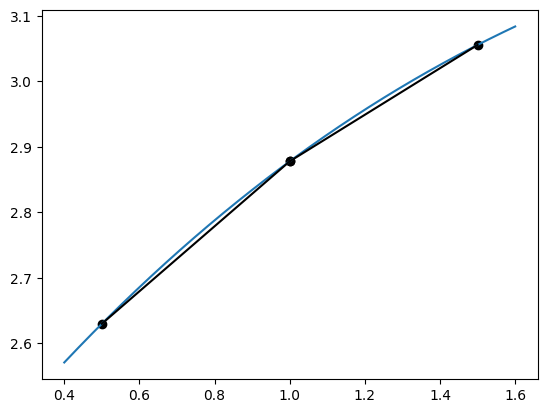

In [23]:
plot_function(volume, 0.4, 1.6)
plot_secant(volume, 0.5, 1)
plot_secant(volume, 1, 1.5)

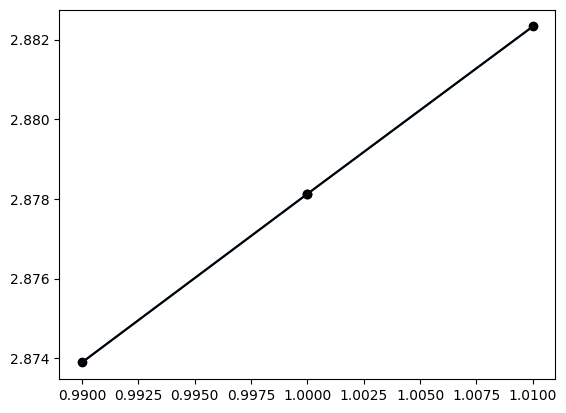

In [24]:
plot_function(volume, 0.99, 1.01)
plot_secant(volume, 0.99, 1)
plot_secant(volume, 1, 1.01)

## 导数：计算切线斜率

* 过某个点的斜率可以采取不断缩小取值范围，来计算流速获得
* 当范围够小时，则流速，就是斜率会达到更大的精度
* 不可无限制迭代，达到精度要求则停止迭代
* 若迭代到两倍的次数还未发现达到精度要求的结果，则说明该函数可能不可导，应产生异常

In [ ]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v, t-h, t+1)
    for i in range(0, 2*digits):
        h = h / 10
        next_approx = average_flow_rate(v, t-h, t+h)

        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    
    raise Exception("Derivative did not converge.")

instantaneous_flow_rate(volume, 1)

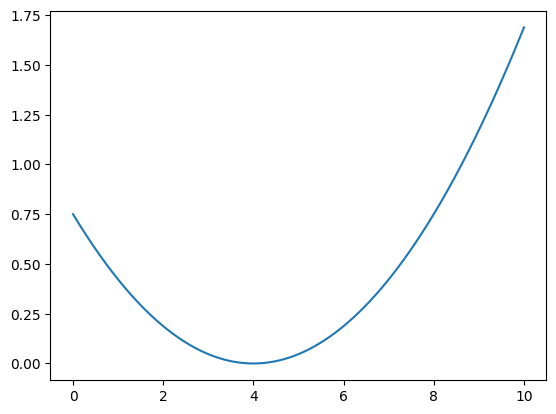

In [27]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v, t)
    return flow_rate_function

plot_function(flow_rate, 0, 10)
plot_function(get_flow_rate_function(volume), 0, 10) #通过容量计算平均流速得出的流速图像

## 导数总结
* 从体积函数中产生流速函数：对体积函数求导

In [29]:
# 计算在dt时间内，依照流速q(t)，体积增加了多少

def small_volume_change(q, t, dt):
    return q(t) * dt

print(small_volume_change(flow_rate, 2, 1))
print(volume(3)-volume(2))
# 这两个值应该相当接近，但事实上偏离很多，就是因为时间间隔较大造成平均流速和实际流速差距较大

0.1875
0.109375


In [31]:
# 减小dt=0.01
print(small_volume_change(flow_rate, 2, 0.01))
print(volume(2.01)-volume(2))
# 这里可以看到较为接近了

0.001875
0.0018656406250001645


In [34]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

print(volume_change(flow_rate, 0, 10, 0.1))
print(volume(10)-volume(0))

4.32890625
4.375


In [37]:
# 减小dt=0.0001，更加近似真实值
print(volume_change(flow_rate, 0, 10, 0.0001))
print(volume(10)-volume(0))

4.3749531257812455
4.375


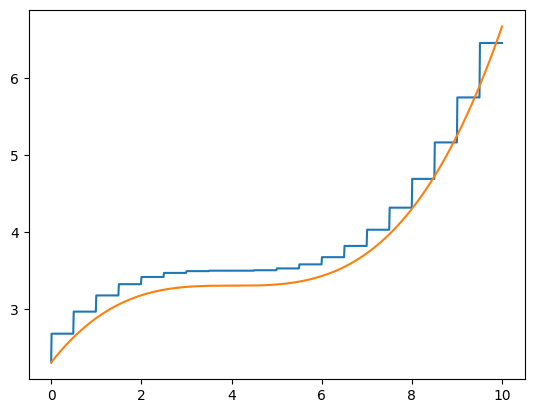

In [38]:
def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

# dt=0.5
plot_function(approximate_volume_function(flow_rate, 2.3, 0.5), 0, 10)
plot_function(volume, 0, 10)

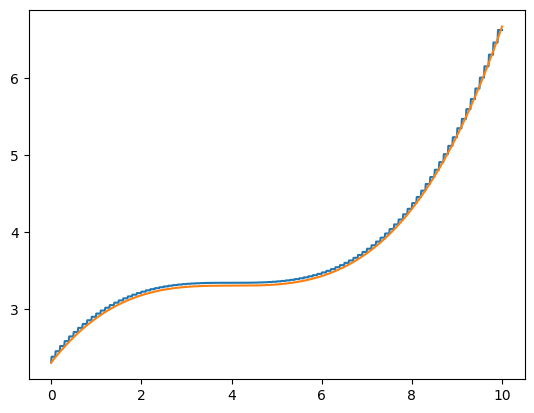

In [40]:
#dt = 0.1
plot_function(approximate_volume_function(flow_rate, 2.3, 0.1), 0, 10)
plot_function(volume, 0, 10)

In [41]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q, 0, T, dt)
        for i in range(0, digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, T, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx

        raise Exception("Dit not converge!")
    return volume_function

d3_function = get_volume_function(flow_rate, 2.3, digits=3)
d6_function = get_volume_function(flow_rate, 2.3, digits=6)
print(volume(1)) # 测得的真实数据
print(d3_function(1))
print(d6_function(1)) # 计算时间会很长
# 两个结果都表示1小时时桶中的石油体积，但d6的数据更加精确一些

2.878125
2.878
2.878125


## 积分总结
* 积分是求导的逆运算
* 变化率->数量用积分 数量->变化率用求导
* 只安装流速计可以通过积分估计体积变化，而只安装体积传感器可以通过求导来估计流速的变化
* 积分是用离散的数据模拟连续的变化，以求得连续变化的一个近似值
* 以上方法计算的积分部分为黎曼和

# 欧拉方法
* 欧拉方法是黎曼和的一种近似，但运算速度会快

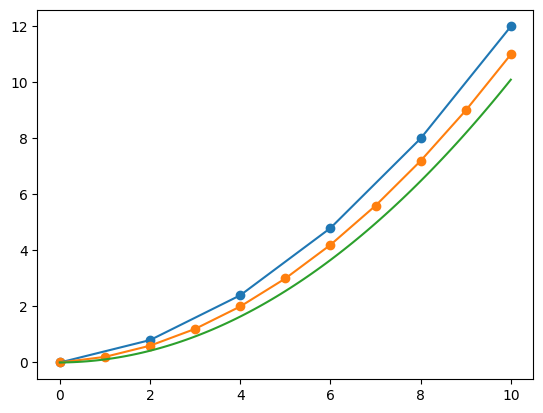

In [53]:
# 计算速度表格
from part1lib import *

def eulers_method(s0, v0, a, total_time, step_count):
    t = 0
    s = s0
    v = v0
    dt = total_time / step_count

    positions = [s]
    for _ in range(step_count):
        t += dt

        v = add(v, scale(dt, a))
        s = add(s, scale(dt, v))
        positions.append(s)

    return positions

plt.plot(*zip(*eulers_method((0, 0), (1, 0), (0, 0.2), 10, 5))) # 这就是飞船飞行的轨迹，欧拉方法只根据变化率和初始状态，计算最终状态
plt.scatter(*zip(*eulers_method((0, 0), (1, 0), (0, 0.2), 10, 5)))
plt.plot(*zip(*eulers_method((0, 0), (1, 0), (0, 0.2), 10, 10)))
plt.scatter(*zip(*eulers_method((0, 0), (1, 0), (0, 0.2), 10, 10)))
plt.plot(*zip(*eulers_method((0, 0), (1, 0), (0, 0.2), 10, 100)))
#plt.scatter(*zip(*route())) # 点太多了，省略不画了

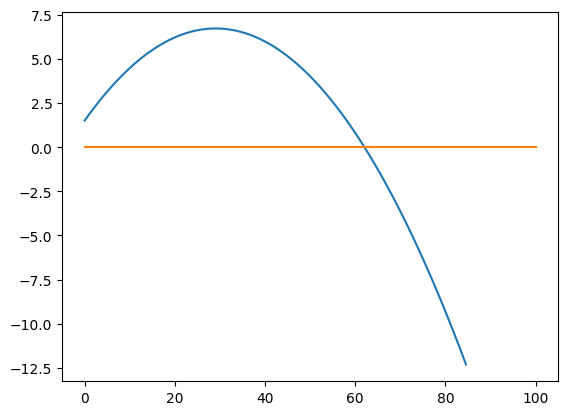

In [56]:
# 练习9.4
from math import *

angle = 20 * pi / 180
s0 = (0, 1.5)
v0 = (30*cos(angle), 30*sin(angle))
a = (0, -9.81)

result = eulers_method(s0, v0, a, 3, 100)
plt.plot(*zip(*result))
plt.plot(*zip((0, 0), (100, 0)))